In [1]:
# load modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [3]:
# load data
df = pd.read_csv('encoded_df.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62739 entries, 0 to 62738
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   location_name      62739 non-null  int64
 1   home_language      62739 non-null  int64
 2   hh_occupation      62739 non-null  int64
 3   hh_edu             62739 non-null  int64
 4   hh_size            62739 non-null  int64
 5   school_distanceKm  62739 non-null  int64
 6   age                62739 non-null  int64
 7   gender             62739 non-null  int64
 8   mothers_edu        62739 non-null  int64
 9   grade              62739 non-null  int64
 10  meansToSchool      62739 non-null  int64
 11  hh_children        62739 non-null  int64
 12  dropout            62739 non-null  int64
dtypes: int64(13)
memory usage: 6.2 MB


In [6]:
df.head()

,location_name,home_language,hh_occupation,hh_edu,hh_size,school_distanceKm,age,gender,mothers_edu,grade,meansToSchool,hh_children,dropout
0,0,2,1,2,5,3,11,1,1,10,0,5,0
1,1,2,1,1,5,4,11,1,1,9,0,5,1
2,1,1,3,2,5,5,11,2,2,10,2,5,0
3,1,1,1,2,5,8,11,1,1,9,0,4,0
4,1,1,3,2,5,5,11,2,2,9,2,5,0


In [7]:
target_column = 'dropout'
X = df.drop(columns=[target_column])
y = df[target_column]

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

Accuracy: 0.9477207523111253
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     17084
           1       0.74      0.68      0.71      1738

    accuracy                           0.95     18822
   macro avg       0.85      0.83      0.84     18822
weighted avg       0.95      0.95      0.95     18822



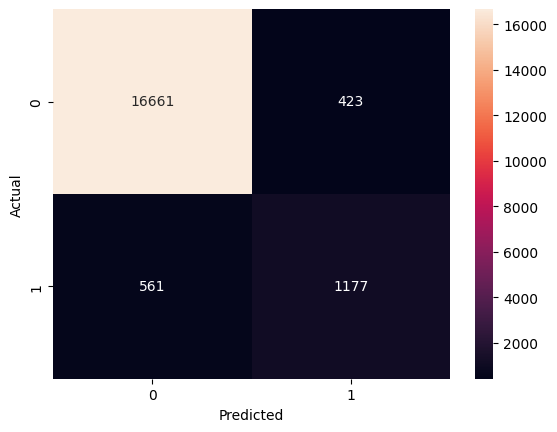

In [13]:
# Choose a classification algorithm (Random Forest is used here as an example)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


# plot a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
from sklearn.svm import SVC

Accuracy: 0.9300286898310488
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     17084
           1       0.63      0.61      0.62      1738

    accuracy                           0.93     18822
   macro avg       0.79      0.78      0.79     18822
weighted avg       0.93      0.93      0.93     18822



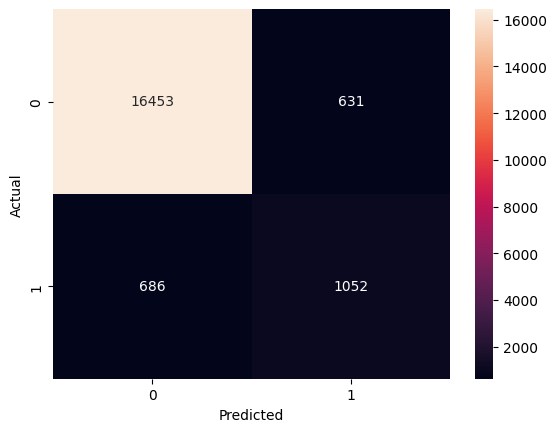

In [15]:
# Create and train the SVM model
model = SVC(kernel='rbf')  # You can also try different kernels like 'rbf', 'poly', etc.
model.fit(X_train, y_train)

# Make predictions
lr_y_pred = model.predict(X_test)

# Evaluate the model
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print("Accuracy:", lr_accuracy)
print("Classification Report:")
print(classification_report(y_test, lr_y_pred))

# plot a confusion matrix
conf_matrix = confusion_matrix(y_test, lr_y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:
lr_y_pred[:10]

array(['Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],
      dtype=object)

Accuracy: 0.9478801402613962
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17084
           1       0.73      0.70      0.71      1738

    accuracy                           0.95     18822
   macro avg       0.85      0.84      0.84     18822
weighted avg       0.95      0.95      0.95     18822



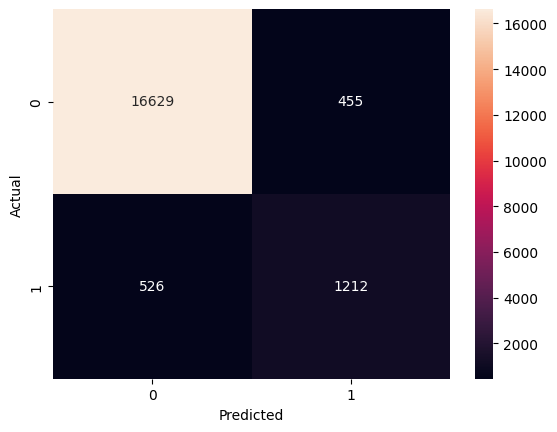

In [16]:
# Create and train the SVM model
model = SVC(kernel='poly', gamma=.1)
model.fit(X_train, y_train)

# Make predictions
lr_y_pred = model.predict(X_test)

# Evaluate the model
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print("Accuracy:", lr_accuracy)
print("Classification Report:")
print(classification_report(y_test, lr_y_pred))

# plot a confusion matrix
conf_matrix = confusion_matrix(y_test, lr_y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
from sklearn.neural_network import MLPClassifier

# Create MLP classifier with probability estimates enabled
model = MLPClassifier(solver='adam', learning_rate_init=0.01, learning_rate='adaptive', activation='tanh')

# Train the model
model.fit(X_train, y_train)

# Get probability estimates
y_prob = model.predict_proba(X_test)


Accuracy: 0.9480395282116671
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     17084
           1       0.74      0.68      0.71      1738

    accuracy                           0.95     18822
   macro avg       0.85      0.83      0.84     18822
weighted avg       0.95      0.95      0.95     18822



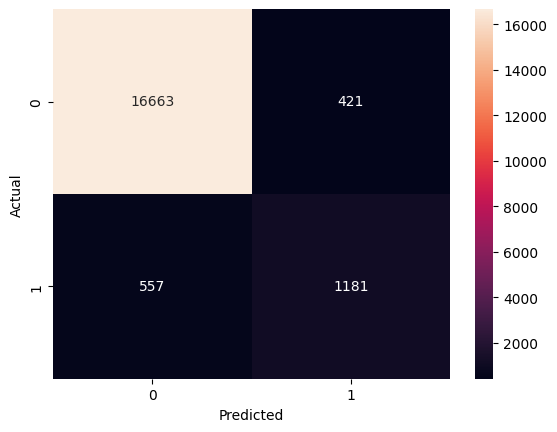

In [18]:
# Get predicted classes based on highest probability estimates
y_pred = y_prob.argmax(axis=1)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)


# Evaluate the model
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# plot a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# Standardize the features (important for KNeighborsClassifier)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Create and train the KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Accuracy: 0.9462331314419297


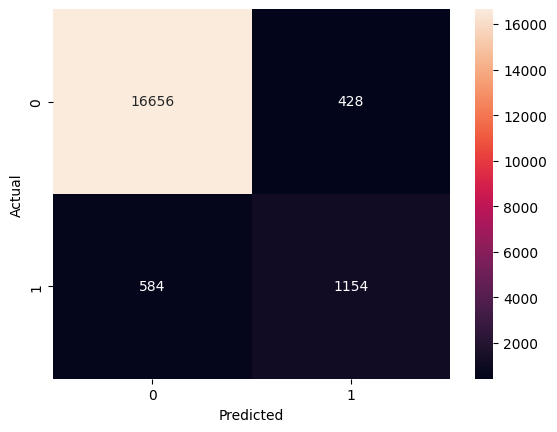

In [22]:
# Make predictions
y_pred = knn_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



# plot a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
# Create and train the Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(n_estimators=200, random_state=42)  # You can adjust the number of estimators (boosting rounds)
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

Gradient Boosting Accuracy: 0.9479863988949102
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17084
           1       0.72      0.70      0.71      1738

    accuracy                           0.95     18822
   macro avg       0.85      0.84      0.84     18822
weighted avg       0.95      0.95      0.95     18822



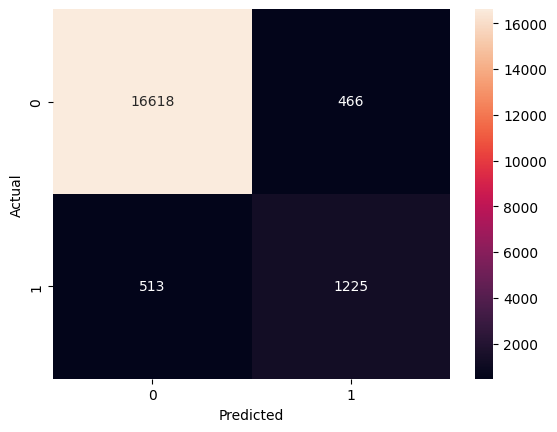

In [25]:
# Make predictions
y_pred = gradient_boosting.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Gradient Boosting Accuracy:", accuracy)


print("Classification Report:")
print(classification_report(y_test, y_pred))

# plot a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
from sklearn.naive_bayes import GaussianNB

In [29]:
# Create and train the Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Make predictions
y_pred = naive_bayes.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Gaussian Naive Bayes Accuracy:", accuracy)

Gaussian Naive Bayes Accuracy: 0.9236000425034534


In [28]:
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Get feature importances (coefficients)
coefficients = logistic_regression.coef_[0]

# Print feature importances
for i, coefficient in enumerate(coefficients):
    print(f"Feature {i}: {coefficient}")


Feature 0: -0.008891356828449694
Feature 1: 0.6680546047235513
Feature 2: 0.28005482844770224
Feature 3: -1.6896417012310871
Feature 4: 3.450523908632391
Feature 5: -1.4251268111563393
Feature 6: -0.2841911443600795
Feature 7: -0.0441171992844953
Feature 8: 0.9052201212884373
Feature 9: 0.8846117746621662
Feature 10: -4.369390818153453
Feature 11: 7.107080603489165


c:\Users\Edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
